In [3]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import IsolationForest

# Define the vectorize_program function
def vectorize_program(program):
    # Tokenize and vectorize the program
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts([program])
    sequence = tokenizer.texts_to_sequences([program])[0]
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence])
    vectorized_program = tf.one_hot(padded_sequence, depth=len(tokenizer.word_index)+1)

    # Pad the program vector with zeros along the second dimension
    max_len = max(len(sequence), 1)
    padded_program = tf.keras.preprocessing.sequence.pad_sequences(vectorized_program, maxlen=max_len, padding='post')
    vectorized_program_2d = np.reshape(padded_program, (-1, padded_program.shape[-1]))

    return vectorized_program_2d

# Define the list of filenames
filenames = ['code1.py', 'code2.py', 'code3.py', 'code4.py', 'code5.py', 'code6.py', 'code7.py', 'code8.py', 'code9.py', 'code10.py', 'code11.py', 'code12.py', 'code13.py', 'code14.py', 'code15.py', 'code16.py', 'code17.py', 'code18.py', 'code19.py', 'code20.py','code21.py', 'code22.py', 'code23.py', 'code24.py', 'code25.py', 'code26.py', 'code27.py', 'code28.py','code29.py', 'code30.py', 'code31.py', 'code32.py', 'code33.py', 'code34.py', 'code35.py', 'code36.py', 'code37.py', 'code38.py', 'code39.py', 'code40.py','code42.py','code43.py','code44.py']
# Loop over the filenames
for filename in filenames:
    # Read the program from the file
    with open(filename, 'r') as file:
        program = file.read()

    # Vectorize the program
    vectorized_program = vectorize_program(program)

    # Split the data into training and testing sets
    train_size = int(0.8 * vectorized_program.shape[0])
    train_data = vectorized_program[:train_size]
    test_data = vectorized_program[train_size:]

    # Fit the IsolationForest model on the training set
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    model.fit(train_data)

    # Use the trained model to predict anomalies in the test set
    predictions = model.predict(test_data)

    # Print the number of anomalies detected by the model
    print(f"Number of anomalies detected in {filename}: {sum(predictions == -1)}")
    


Number of anomalies detected in code1.py: 0
Number of anomalies detected in code2.py: 0
Number of anomalies detected in code3.py: 0
Number of anomalies detected in code4.py: 0
Number of anomalies detected in code5.py: 0
Number of anomalies detected in code6.py: 0
Number of anomalies detected in code7.py: 0
Number of anomalies detected in code8.py: 0
Number of anomalies detected in code9.py: 1
Number of anomalies detected in code10.py: 1
Number of anomalies detected in code11.py: 0
Number of anomalies detected in code12.py: 0
Number of anomalies detected in code13.py: 1
Number of anomalies detected in code14.py: 0
Number of anomalies detected in code15.py: 0
Number of anomalies detected in code16.py: 0
Number of anomalies detected in code17.py: 1
Number of anomalies detected in code18.py: 0
Number of anomalies detected in code19.py: 0
Number of anomalies detected in code20.py: 0
Number of anomalies detected in code21.py: 0
Number of anomalies detected in code22.py: 0
Number of anomalies

In [10]:

import pandas as pd

In [11]:
predictions


array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
predictions_series = pd.Series(predictions)


In [14]:
index_labels = ['A', 'B', 'C', 'D', 'E','F','G','H','I']
predictions_series = pd.Series(predictions, index=index_labels)


In [17]:
original_data = [1, 2, 3, 4, 5,6,7,8,9]
df = pd.DataFrame({'original_data': original_data, 'predictions': predictions_series})


In [18]:
print(df)

   original_data  predictions
A              1            1
B              2            1
C              3            1
D              4            1
E              5            1
F              6            1
G              7            1
H              8            1
I              9            1


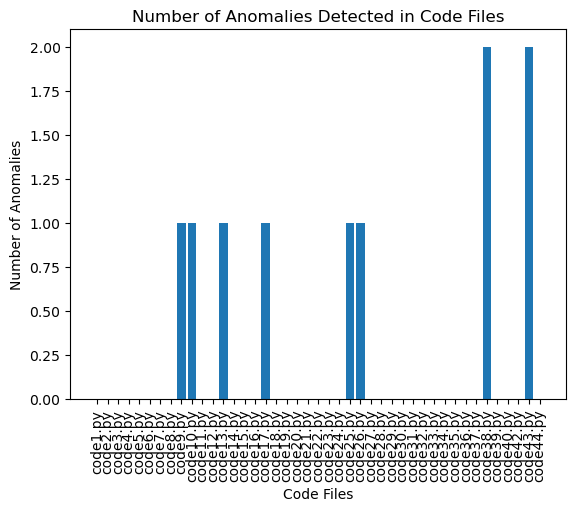

In [31]:
import matplotlib.pyplot as plt

# Define the data
code_files = ['code1.py', 'code2.py', 'code3.py', 'code4.py', 'code5.py', 'code6.py', 'code7.py', 'code8.py',
              'code9.py', 'code10.py', 'code11.py', 'code12.py', 'code13.py', 'code14.py', 'code15.py', 'code16.py',
              'code17.py', 'code18.py', 'code19.py', 'code20.py','code21.py', 'code22.py', 'code23.py', 'code24.py', 'code25.py', 'code26.py', 'code27.py', 'code28.py','code29.py', 'code30.py', 'code31.py', 'code32.py', 'code33.py', 'code34.py', 'code35.py', 'code36.py', 'code37.py', 'code38.py', 'code39.py', 'code40.py','code42.py','code43.py','code44.py']
anomaly_counts = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0]

# Create the bar chart
plt.bar(code_files, anomaly_counts)

# Set the chart title and axis labels
plt.title('Number of Anomalies Detected in Code Files')
plt.xlabel('Code Files')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=90)

# Display the chart
plt.show()


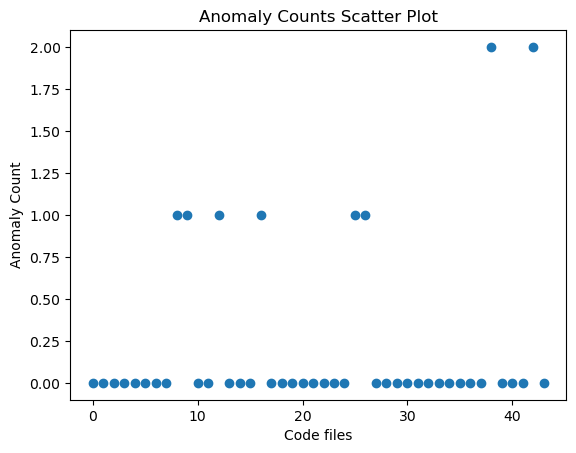

In [33]:
import matplotlib.pyplot as plt

code_files = ['code1.py', 'code2.py', 'code3.py', 'code4.py', 'code5.py', 'code6.py', 'code7.py', 'code8.py',
              'code9.py', 'code10.py', 'code11.py', 'code12.py', 'code13.py', 'code14.py', 'code15.py', 'code16.py',
              'code17.py', 'code18.py', 'code19.py', 'code20.py','code21.py', 'code22.py', 'code23.py', 'code24.py', 'code25.py', 'code26.py', 'code27.py', 'code28.py','code29.py', 'code30.py', 'code31.py', 'code32.py', 'code33.py', 'code34.py', 'code35.py', 'code36.py', 'code37.py', 'code38.py', 'code39.py', 'code40.py','code42.py','code43.py','code44.py']

anomaly_counts = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0]

# Create x-axis values
x = list(range(len(anomaly_counts)))

# Create scatter plot
plt.scatter(x, anomaly_counts)

# Add labels and title
plt.xlabel('Code files')
plt.ylabel('Anomaly Count')
plt.title('Anomaly Counts Scatter Plot')

# Display plot
plt.show()
